In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
sns.set_style("dark")
sns.set(style="darkgrid", color_codes=True)

import matplotlib.pyplot as plt

In [3]:
# Import the training data
training_path = "train.csv"
training_df = pd.read_csv(training_path)

In [5]:
# ********************* Cleanup actions *********************

train_data = training_df.copy()
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
male_data = train_data.drop(train_data[train_data['Sex'] == 'female'].index)
print(male_data.shape)
male_data.head()

(577, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name) # Find a word between a space and with a .(dot) after
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger names
male_data['Title'] = male_data['Name'].apply(get_title)

In [11]:
#Categorize titles
male_data['Title'] = male_data['Title'].replace(['Lady', 'Countess', 'Dona', 'Col','Don', 'Major', 'Sir', 'Dr', 'Rev', 'Jonkheer'], 'Rare')
male_data['Title'] = male_data['Title'].replace(['Capt'], 'Crew')

male_data['Title'] = male_data['Title'].replace('Mlle', 'Miss')
male_data['Title'] = male_data['Title'].replace('Ms', 'Miss')
male_data['Title'] = male_data['Title'].replace('Mme', 'Mrs')

# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
male_data['Title'] = male_data['Title'].map(title_mapping)
male_data['Title'] = male_data['Title'].fillna(0)

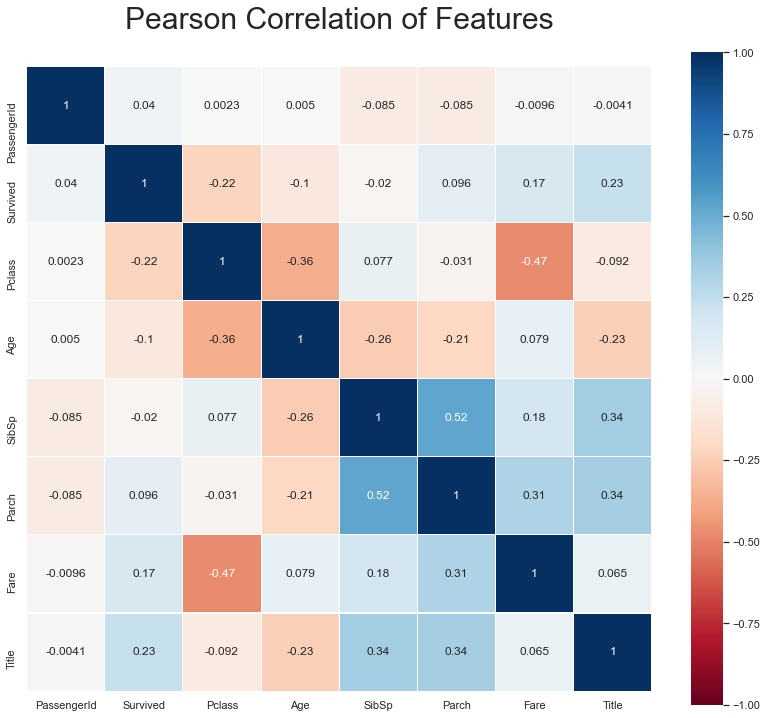

In [12]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size=30, y=1.05)
sns.heatmap(male_data.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).astype(float).corr(),
linewidths=0.1,
vmax=1.0, 
vmin=-1,
square=True, 
cmap=colormap, 
linecolor='white', 
annot=True)
plt.show()

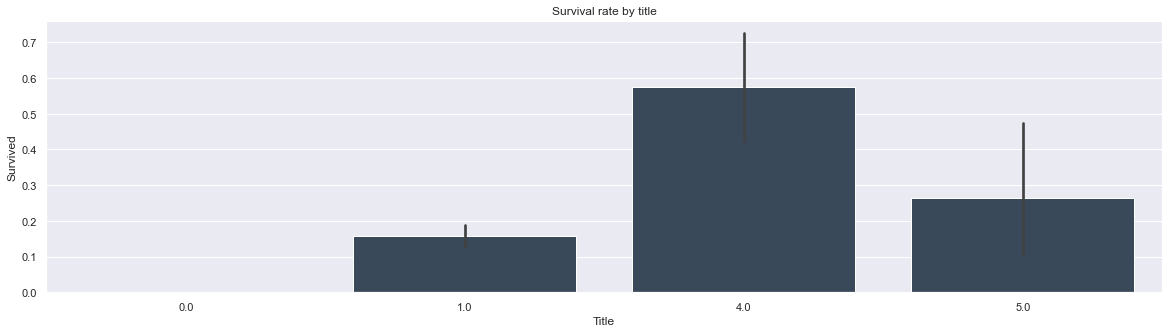

In [13]:
plt.figure(figsize=(20, 5))
sns.barplot(data=male_data, x="Title", y="Survived", color="#34495e")
plt.title("Survival rate by title")
plt.show()

Text(0.5, 1.0, 'Survival rate to fare')

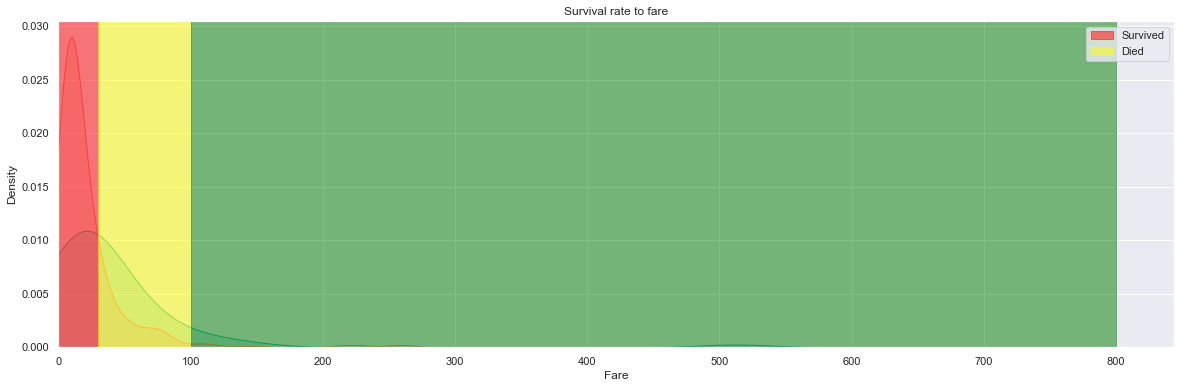

In [22]:
plt.figure(figsize=(20,6))
sns.kdeplot(data=male_data["Fare"][male_data["Survived"] == 1], color="lightseagreen", shade=True)
sns.kdeplot(data=male_data["Fare"][male_data["Survived"] == 0], color="salmon", shade=True)
plt.axvspan(0, 30, color='red', alpha=0.5)
plt.axvspan(30.01, 100, color='yellow', alpha=0.5)
plt.axvspan(100.01, 800, color='green', alpha=0.5)
plt.legend(['Survived', 'Died'])

# Start at 0
plt.xlim(0)
plt.title("Survival rate to fare")

In [15]:
male_data['family_count'] = male_data['SibSp'] + male_data['Parch']

# If the family count = 0 then the person travels alone (1), otherwise not (0)
male_data['travel_alone'] = np.where(male_data['family_count'] == 0, 1, 0)

male_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

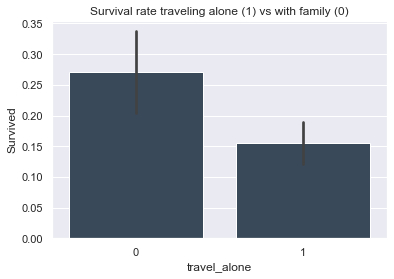

In [17]:
sns.barplot(data=male_data, x="travel_alone", y="Survived", color="#34495e")
plt.title("Survival rate traveling alone (1) vs with family (0)")
plt.show()

In [23]:
def bin_fare(row):
    if row['Fare'] < 30:
        row['Cheap'] = 1
        row['Medium'] = 0
        row['Expensive'] = 0

    elif row['Fare'] < 100:
        row['Cheap'] = 0
        row['Medium'] = 1
        row['Expensive'] = 0

    else:
        row['Cheap'] = 0
        row['Medium'] = 0
        row['Expensive'] = 1
    
    return row

In [26]:
male_data.apply(lambda row: bin_fare(row), axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family_count,travel_alone,Cheap,Medium,Expensive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1.0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1.0,0,1,1,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,NaN,Q,1.0,0,1,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,1.0,0,1,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4.0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S,1.0,0,1,1,0,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S,1.0,0,1,1,0,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,5.0,0,1,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,1.0,0,1,0,1,0
